In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib qt5

# Bayes theorem in medicine

Patient:
- 'G' : gesund
- 'K' : krank

Test:
- '+': positiv
- '-': negativ

## Test-Wahrscheinlichkeiten:

| Patient gesund | Patient krank
--- | --- | --- 
Test positiv:  | p(+ &#124; G) = 0.1 | p(+ &#124; K) = 0.95
               | (falsch-positiv)  | (richtig-positiv)
Test Negativ:  | p(- &#124; G) = 0.9 | p(- &#124; K) = 0.05
               | (richtig-negativ) | (falsch-negativ)

Sensitivität:
$ p(+ | K) = \frac{p(+ | K)}{p(+ | K) + p(- | K)} $

Spezifität:
$ p(- | G) = \frac{p(- | G)}{p(- | G) + p(+ | G)} $

## Krankheits-Wahrscheinlichkeiten:

Prävalenz:

$ p( K ) $

$\Rightarrow p(G) = 1- p( K ) $

In [2]:
# parameter
pPK = 0.95 # Sensitivität
pNK = 1-pPK
pNG = 0.9 # Spezifität
pPG = 1-pNG


pK = np.linspace(0,1,1e3) # Prävalenz

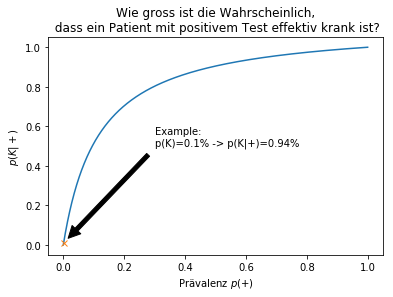

In [4]:
#Bayes theorem
pP = pPK*pK+pPG*(1-pK)
pKP = pPK*pK/pP

#plot
fig,ax=plt.subplots()
ax.plot(pK,pKP)
ax.set_xlabel('Prävalenz $p(+)$')
ax.set_ylabel('$p(K|+)$')
ax.set_title('Wie gross ist die Wahrscheinlich,\n dass ein Patient mit positivem Test effektiv krank ist?')
pKex = 0.001 #Beispiel Prävalenz von 0.1%
pKPex = pPK*pKex/(pPK*pKex+pPG*(1-pKex))
ax.plot(pKex,pKPex,'x')
ax.annotate('Example:\np(K)={:.1f}% -> p(K|+)={:.2f}%'.format(pKex*100,pKPex*100), xy=(pKex, pKPex), xytext=(0.3, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()